# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])


df_diabetes = pd.read_csv("diabetes_dataset.csv")
df_kidney = pd.read_csv("Kidney_dataset.csv")
df_hypertension = pd.read_csv("hypertension_dataset.csv")

print("Diabetes Dataset:")
print(df_diabetes.head(), "\n")

print("Kidney Dataset:")
print(df_kidney.head(), "\n")

print("Hypertension Dataset:")
print(df_hypertension.head(), "\n")

Diabetes Dataset:
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0      

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

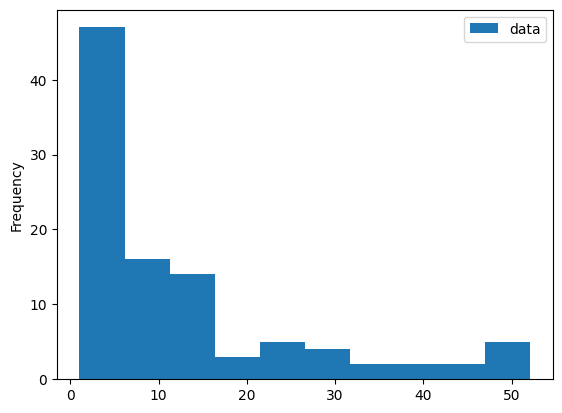

In [4]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

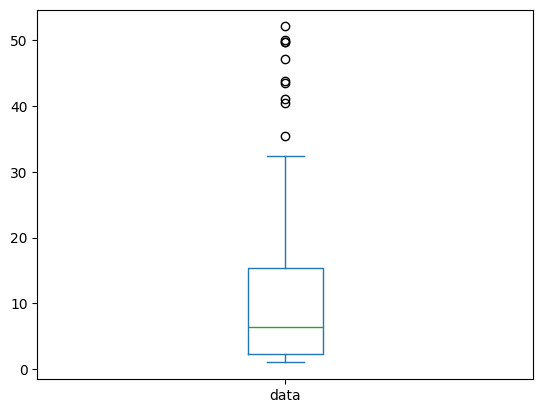

In [5]:
df.plot.box()

## Histogram Pros and Cons
Pros: Makes it easy to visually see the clusters (or gaps) in the data as well as the overall shape. 
Cons: Bin size may skew information, harder to see outliers. 

## Boxplot Pros and Cons
Pros: Shows summary info clearly(mean, outliers, etc), easy to compare side by side. 
Cons: Doesnt show distribution shape, harder to understand if not presenting to an informed/technical crowd.

## What I would choose and how to improve:
I would choose the boxplot for this data. We are trying to focus on the expensive drug products so the boxplot would show how far the high prices deviate as well as any outliers. It may make it more visually informative to incorperate grid lines. This could also be rotated horizontally to make it easier to read large or skewed numbers. 

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

# **Diabetes Dataset**

## Diabetes Dataset: BMI 

### BMI Histogram

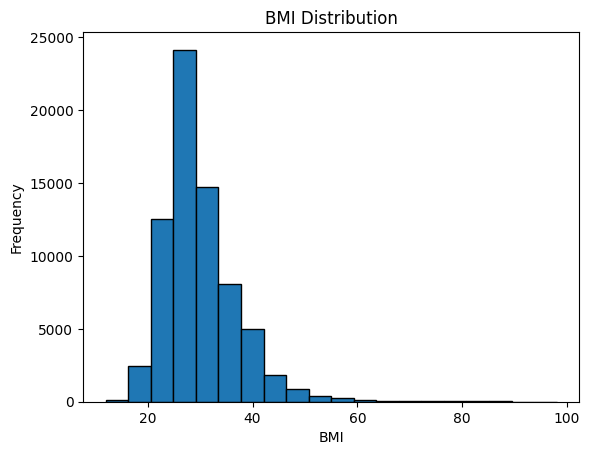

In [6]:
plt.hist(df_diabetes["BMI"], bins=20, edgecolor='black')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

### BMI Mean, Median, Mode, Skew

In [39]:
print("Mean BMI:", round(df_diabetes["BMI"].mean(), 2))
print("Median BMI:", df_diabetes["BMI"].median())
print("Mode BMI:", df_diabetes["BMI"].mode()[0])
print("Skewness of BMI:", df_diabetes["BMI"].skew())

Mean BMI: 29.86
Median BMI: 29.0
Mode BMI: 27.0
Skewness of BMI: 1.7191801918140364


### BMI Bin Width

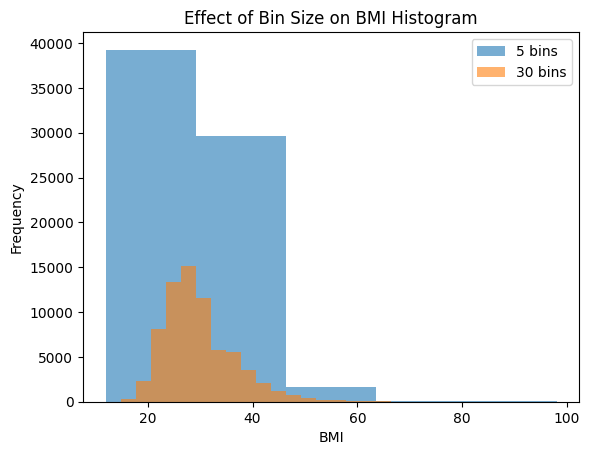

In [10]:
plt.hist(df_diabetes["BMI"], bins=5, alpha=0.6, label="5 bins")
plt.hist(df_diabetes["BMI"], bins=30, alpha=0.6, label="30 bins")
plt.title("Effect of Bin Size on BMI Histogram")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Diabetes Dataset: Age

### Age is coded in categories: 
1: 18-24,
2: 25-29,
3: 30-34,
4: 35-39,
5: 40-44,
6: 45-49,
7: 50-54,
8: 55-59,
9: 60-64,
10: 65-69,
11: 70-74,
12: 75-79,
13: 80+

In [23]:
print("Mean Age:", round(df_diabetes["Age"].mean(), 2))
print("Median Age:", df_diabetes["Age"].median())
print("Mode Age:", df_diabetes["Age"].mode()[0])

print("Skewness of Age:", df_diabetes["Age"].skew())

Mean Age: 8.58
Median Age: 9.0
Mode Age: 10.0
Skewness of Age: -0.5459227712328194


### Histogram of Age Distribution

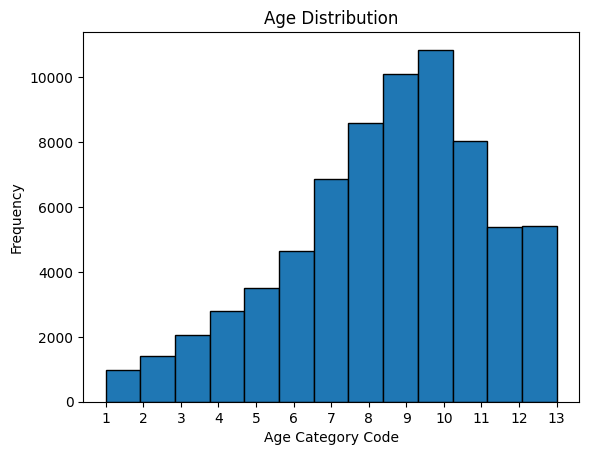

In [24]:
plt.hist(df_diabetes["Age"], bins=13, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age Category Code")
plt.ylabel("Frequency")
plt.xticks(range(1, 14))  # Show all age category codes
plt.show()

## Diabetes Dataset: General Health Rating

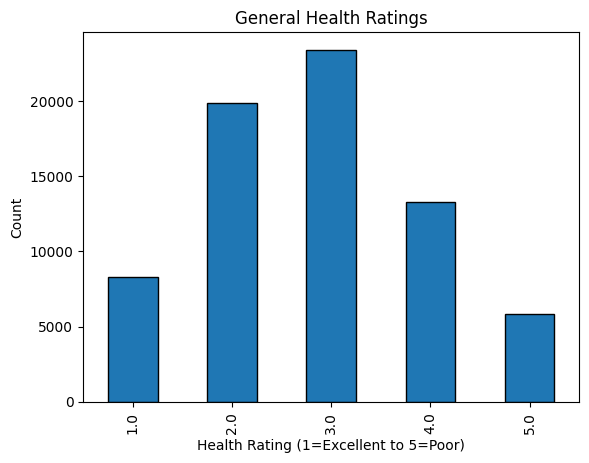

In [44]:
df_diabetes["GenHlth"].value_counts().sort_index().plot(kind="bar", edgecolor='black')
plt.title("General Health Ratings")
plt.xlabel("Health Rating (1=Excellent to 5=Poor)")
plt.ylabel("Count")
plt.show()

# **Diabetes Dataset Univariate Conclusions:**

Distribution Shape:

BMI: The BMI distribution is slightly right-skewed, showing a concentration of individuals with BMI values in the normal to overweight range. This aligns with typical population health data.

Age: The age distribution appears roughly uniform across the age categories in the dataset, indicating a balanced sample across different age groups.

General Health Rating: The bar plot reveals that most participants rate their health as average to good, with fewer people reporting poor health.


# **Hypertension Dataset**

### Hypertension BMI Histogram

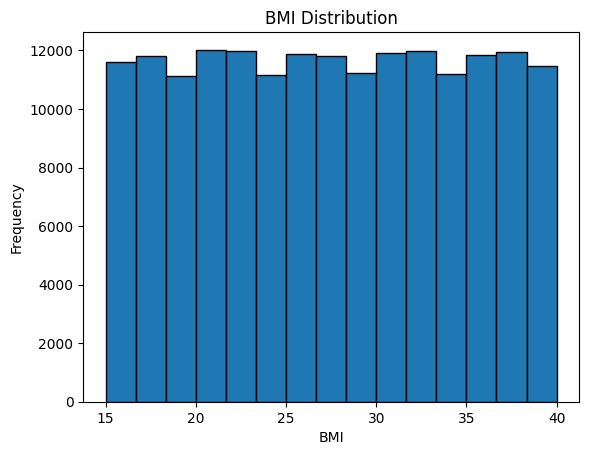

In [12]:
plt.hist(df_hypertension["BMI"], bins=15, edgecolor='black')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

### Hypertension Bar Plot(Smoking Status)

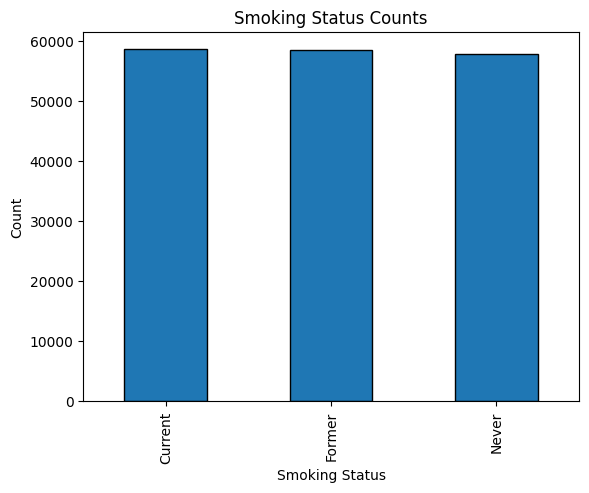

In [14]:
df_hypertension["Smoking_Status"].value_counts().plot(kind="bar", edgecolor='black')
plt.title("Smoking Status Counts")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.show()

### Age Histogram

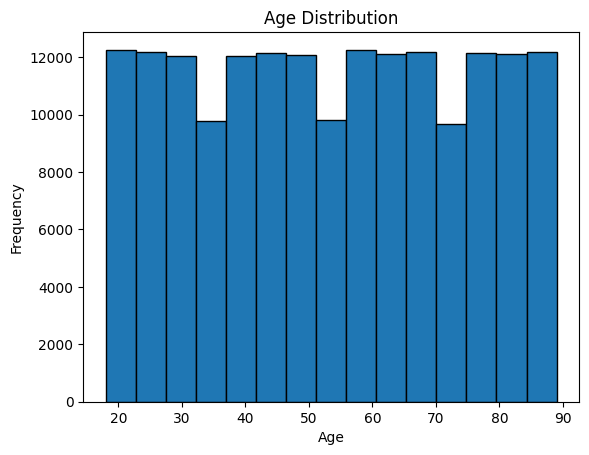

In [52]:
plt.hist(df_hypertension["Age"], bins=15, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Systolic BP Histogram

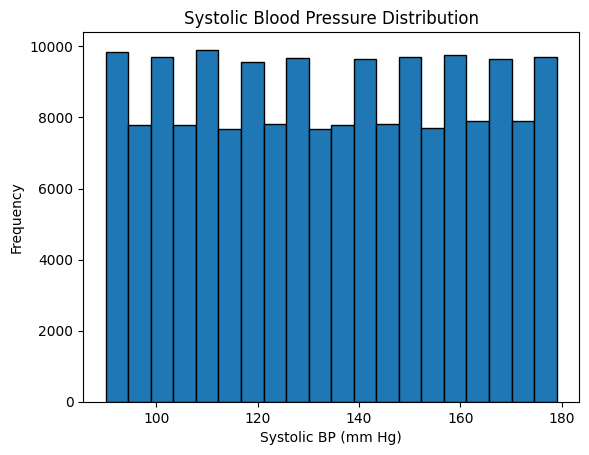

In [51]:
plt.hist(df_hypertension["Systolic_BP"], bins=20, edgecolor='black')
plt.title("Systolic Blood Pressure Distribution")
plt.xlabel("Systolic BP (mm Hg)")
plt.ylabel("Frequency")
plt.show()


### Hypertension BMI Stats

In [49]:
print("Mean BMI:", round(df_hypertension["BMI"].mean(), 2))
print("Median BMI:", df_hypertension["BMI"].median())
print("Mode BMI:", df_hypertension["BMI"].mode()[0])
print("Skewness of BMI:", df_hypertension["BMI"].skew())

Mean BMI: 27.49
Median BMI: 27.5
Mode BMI: 22.5
Skewness of BMI: -0.00024476882379674845


### Systolic BP Stats

In [50]:
print("Mean Systolic BP:", round(df_hypertension["Systolic_BP"].mean(), 2))
print("Median Systolic BP:", df_hypertension["Systolic_BP"].median())
print("Mode Systolic BP:", df_hypertension["Systolic_BP"].mode()[0])
print("Skewness of Systolic BP:", df_hypertension["Systolic_BP"].skew())

Mean Systolic BP: 134.51
Median Systolic BP: 135.0
Mode Systolic BP: 174
Skewness of Systolic BP: -0.0011217704061266432


# **Hypertension Dataset Univariate Conclusions:**
BMI is moderately right skewed, with most individuals clustered in the over weight range. This aligns with the known obesity related risks associated with hypertension. Age is spread evenly across adult ranges. The distributions and summary statistics indicate that the data is generally consistent and usable for further analysis. There are no obvious extreme outliers that would skew the results. These findings support the project’s goal of identifying demographic and lifestyle risk factors for hypertension, setting a strong foundation for bivariate analysis to explore relationships between variables like BMI, smoking status, and blood pressure readings.

# **Kidney Dataset**

### Age Histogram

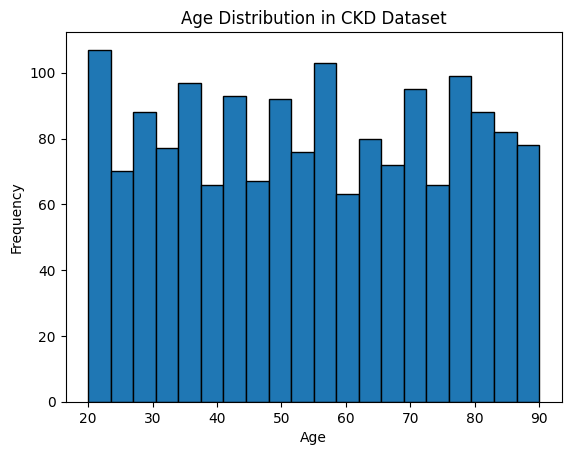

In [53]:
plt.hist(df_kidney["Age"], bins=20, edgecolor='black')
plt.title("Age Distribution in CKD Dataset")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Age Stats

In [54]:
print("Mean Age:", round(df_kidney["Age"].mean(), 2))
print("Median Age:", df_kidney["Age"].median())
print("Mode Age:", df_kidney["Age"].mode()[0])
print("Skewness of Age:", df_kidney["Age"].skew())


Mean Age: 54.44
Median Age: 54.0
Mode Age: 81
Skewness of Age: 0.0031523709888792374


### BMI Histogram

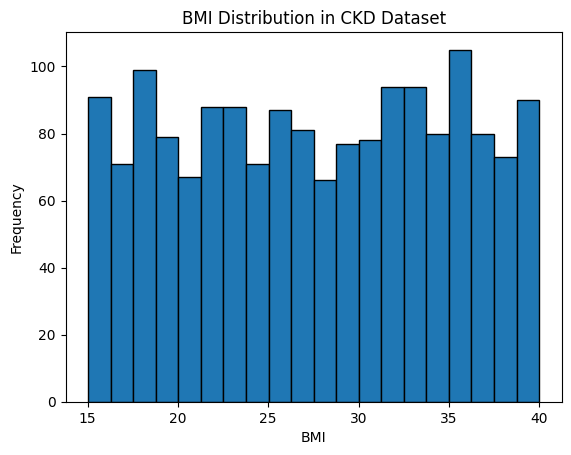

In [55]:
plt.hist(df_kidney["BMI"], bins=20, edgecolor='black')
plt.title("BMI Distribution in CKD Dataset")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

### BMI Stats

In [56]:

print("Mean BMI:", round(df_kidney["BMI"].mean(), 2))
print("Median BMI:", df_kidney["BMI"].median())
print("Mode BMI:", df_kidney["BMI"].mode()[0])
print("Skewness of BMI:", df_kidney["BMI"].skew())

Mean BMI: 27.62
Median BMI: 27.652077393512773
Mode BMI: 15.033888112448722
Skewness of BMI: -0.04188714039290046


### Systolic BP Histogram

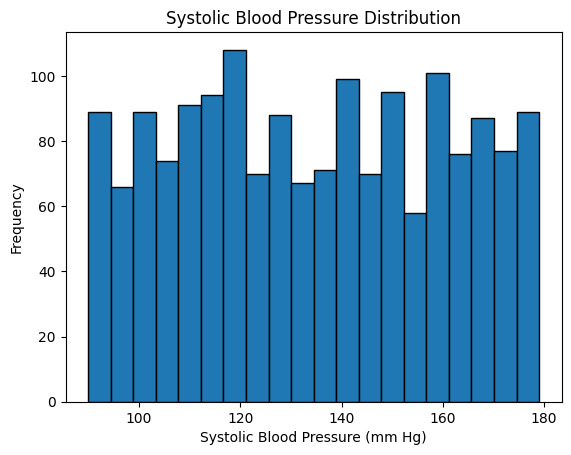

In [62]:
plt.hist(df_kidney["SystolicBP"].dropna(), bins=20, edgecolor='black')
plt.title("Systolic Blood Pressure Distribution")
plt.xlabel("Systolic Blood Pressure (mm Hg)")
plt.ylabel("Frequency")
plt.show()

### Systolic BP Stats

In [63]:
print("Mean Systolic BP:", round(df_kidney["SystolicBP"].mean(), 2))
print("Median Systolic BP:", df_kidney["SystolicBP"].median())
print("Mode Systolic BP:", df_kidney["SystolicBP"].mode()[0])
print("Skewness of Systolic BP:", df_kidney["SystolicBP"].skew())

Mean Systolic BP: 134.39
Median Systolic BP: 134.0
Mode Systolic BP: 116
Skewness of Systolic BP: 0.03146498308033247


# **Kidney Dataset Univariate Conclusions:**
BMI has a right skew which is consistant across all datasets, age appears to be uniform across all adult ranges. Overall, the data distributions are consistent with what might be expected from a chronic kidney disease cohort. No major data quality issues like missing or impossible values were evident in these features.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

### Horizontal Bar Chart (Catagory Comparisons) from page 56

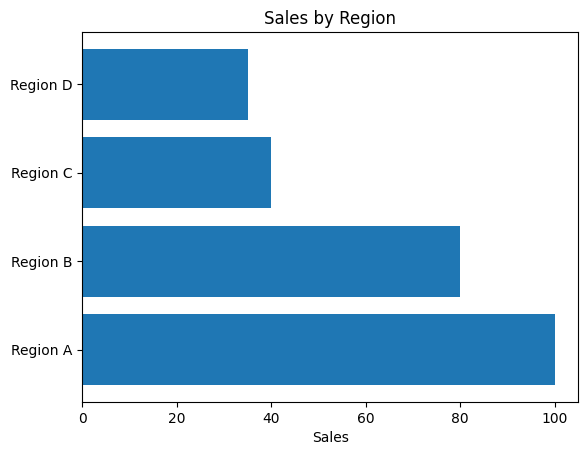

In [20]:

regions = ['Region A', 'Region B', 'Region C', 'Region D']
sales = [100, 80, 40, 35]

plt.barh(regions, sales)
plt.xlabel('Sales')
plt.title('Sales by Region')
plt.show()